Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [1]:
COLLABORATORS = "me myself and i"

---

In [2]:
%matplotlib inline
%precision 16
import numpy
from scipy.special import erf, fresnel
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 4:  Numerical  Quadrature 

## Question 1 - Basic  Quadrature Rules

The Error Function $\mathrm{erf}(x)$ is defined by the definite integral

$$
    \mathrm{erf}(x) = \frac{2}{\pi}\int_0^x e^{-t^2}dt
$$ 

We will use this function to test and understand the different errors associated with a range of both single interval and extended quadrature rules.  

Use the function definitions below to write a set of functions for approximating 
$$
 I[f] =  \int_a^b f(x) dx
$$ 
which we will use for testing against $\mathrm{erf}(x)$

**(a)** [8] Single step quadrature rules

Write short python functions for calculating $I[f]$ for the following newton-Cotes  quadrature rules on a single interval

* Left-Rectangle rule (a 1-point quadrature rule like  Mid-point, but evaluated at $x=a$, not the mid-point)
* Mid-point rule
* Trapezoidal rule
* Simpson's Rule

In [3]:
def I_left(f, a, b):
    """ Left rectangle rule"""
    I_left = f(a) * (b - a)
    return I_left
    
def I_midpoint(f, a, b):
    """ Newton-Cotes Midpoint rule"""
    mid = (b + a) / 2
    I_midpoint = f(mid) * ( b - a )
    return I_midpoint
    
def I_trapezoid(f, a, b):
    """ Newton-Cotes Midpoint rule"""
    delta = b - a
    I_trapezoid = (delta / 2) * (f(a) + f(b))
    return I_trapezoid
    
def I_simpson(f, a, b):
    """ Newton-Cotes Simpsons rule"""
    delta = (b-a) / 2
    simp = (b+a) / 2
    I_simpson = (delta / 3) * (f(a) + 4 * f(simp) + f(b)) 
    return I_simpson

In [4]:
# test against erf(1.)

x = 1.0
I_true = erf(x)
print('x = {}, erf(x) = {}\n'.format(x,I_true))
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

I = numpy.zeros(4)
I[0] = I_left(f, 0., x)
I[1] = I_midpoint(f, 0., x)
I[2] = I_trapezoid(f, 0., x)
I[3] = I_simpson(f, 0., x)

err = numpy.abs( I - I_true)/numpy.abs(I_true)
answer = numpy.array([0.339003328982087,  0.0428168411464673,
          0.084202437312641, 0.0004770816600977])
numpy.testing.assert_allclose(err, answer)
print('success!')

x = 1.0, erf(x) = 0.8427007929497148

success!


**(b)** [8] Repeat the exercise for  3 point Gauss-Legendre Quadrature

* First:  calculate the weights $w_i$, using the method of undetermined coefficients such that the quadrature rule exactly integrates the monomials $1, x, x^2$ over the interval $x\in[-1,1]$.
(hint:  the 3 quadrature points $x_i$ are the roots of 

$$
    P_3(x) = (5x^3 - 3x)/2
$$
and this rule will exactly integrate polynomials up to order 5).

**Answer to question 1 (b)**

The three roots of $P_3(x)$ are:

$$
x_1 = 0 \\
x_2 = \sqrt\frac{3}{5} \\
x_3 = -\sqrt\frac{3}{5}
$$

Let us first calculate $P'_3(x) = \frac{3}{2}(5x^2 - 1)$ and it's value at $x_1,x_2,x_3$:
$$
P'_3(x_1) = -\frac{3}{2} \\
P'_3(x_2) = 3 \\
P'_3(x_3) = 3
$$

Now for our weights:

$$
w_1 = \frac{2}{(1-{x_1}^2)(P'_3(x_1))^2} = \frac{8}{9}\\
w_2 = \frac{2}{(1-{x_2}^2)(P'_3(x_2))^2} = \frac{5}{9}\\
w_3 = \frac{2}{(1-{x_3}^2)(P'_3(x_3))^2} = \frac{5}{9}
$$

Next, implement your 3-point GL quadrature scheme to approximate 

$$
    \int_a^b f(x) dx
$$
for an arbitrary interval $x\in [a,b]$ (remember the affine mapping). 

In [5]:
def I_GL3(f, a, b):
    """ 3 point Gauss-Legendre Quadrature rule for an arbitrary interval x \in [a,b]"""
    w1 = 8/9
    w2 = 5/9
    w3 = 5/9
    p1 = 0
    p2 = numpy.sqrt(3/5)
    p3 = -numpy.sqrt(3/5)

    h = (b-a)/2
    h2 = (a+b)/2
    
    return h*(w1*f(p1*h + h2) + w2*f(p2*h + h2) + w3*f(p3*h + h2))

In [6]:
x = 1.0
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

I = I_GL3(f, 0., x)
err = numpy.abs( I - I_true)/numpy.abs(I_true)
print('x = {}, erf(x) = {}'.format(x,I_true))
print('       I_GL3(x) = {}, err={}\n'.format(I,err))

answer = 1.2785635535382798e-05
numpy.testing.assert_allclose(err, answer)
print('success!')

x = 1.0, erf(x) = 0.8427007929497148
       I_GL3(x) = 0.8426900184845107, err=1.2785635535382798e-05

success!


**(c)** [8] Extended Quadrature rules. 

All of the above rules approximate the integral for a single "panel" over the interval $[a,b]$, but can be extended to calculate the quadrature of $N$ panels that subdivide the interval.  

Write a function that computes

$$
    I_N[f] = \int_a^b f(x) dx = \sum_{n=1}^N I_{method}[f]_n
$$


where $I_{method}[f]_n$ is one of the quadrature methods used above. 

Note, this won't be the most efficient way to implement many of these methods,  but that's not really the issue here.

In [7]:
def quadN(f, a, b, N, method=I_midpoint):
    """ 
    integrate a function f over the interval x in [a,b] using 
    an extended quadrature rule that implements a single interval
    quadrature rule over N panels of width (a - b)/N 
        
    Parameters:
    -----------
        
    f:  function f(x) (type float)
    a: float
        left boundary of interval
    b: float
        right boundary of interval
    N: integer
        number of panels to subdivide [a,b]
    method:  quadrature function with interface I(f, x0, x1) (real)
        returns quadrature approximation for subinterval [x0, x1]
        defaults to a midpoint rule
            
    Returns:
    --------
    I_N:  extended quadrature approximation of \int_a^b f(x) dx
        
    """
    x = numpy.linspace(a, b, N + 1)
    I = numpy.zeros(N)
    I[0] = method(f, x[0], x[1])
    for i in range(1, len(I)):
        I[i] = I[i - 1] + method(f, x[i], x[i+1])
    
    I_N = I[-1]
    
    return I_N   

In [8]:
# Let's test against erf(1)

x = 1.
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

# set the number of panels in a list
N = [ 2**n for n in range (5)]

# integrate using the extended mid-point scheme and calculate relative errors for each N
err = numpy.zeros(len(N))
for i,n in enumerate(N):
    I = quadN(f, 0., x, n, method=I_midpoint)
    err[i] = numpy.abs(I - I_true)/numpy.abs(I_true)
    print('N = {}, I = {}, err = {}'.format(n, I, err[i]) )
    
answer = numpy.array([0.0428168411464673, 0.0104091587540129,
                      0.0025749021678512, 0.0006419796806984,
                      0.0001603854223201])
numpy.testing.assert_allclose(answer,err)
print('success!')
                    

N = 1, I = 0.8787825789354448, err = 0.042816841146467305
N = 2, I = 0.8514725992856609, err = 0.010409158754012854
N = 4, I = 0.844870665048331, err = 0.00257490216785125
N = 8, I = 0.843241789735697, err = 0.0006419796806984446
N = 16, I = 0.8428359498722815, err = 0.00016038542232009014
success!


**(d)** [10] Now *write a function* to make a plot that  compares the convergence behavior of all of the above methods (if you make it a function, you will be able to reuse it in the next  problem).


This function should  make a single, beautiful log-log plot with the following information

* plot the *relative error* for each quadrature rule with respect to 
$$
    I_{true} = \mathrm{erf}(1) = 0.8427007929497148
$$
for 
$$
    N = 2^n \quad \text{panels}\quad \text{for}\, n=0,1,\ldots,10
$$

* a legend that labels each curve with the name of the method

Hint 1: there are some nice python tricks for doing this relatively efficiently, e.g. you can loop over a list of methods and extract the name with 

`name = method.__name__`


* the calculated rate of convergence of each  scheme. 

Note, if we define the convergence behavior of the error as
$$
    |e| = C\Delta x^p
$$

calculate $C$ and $p$ for each method and plot the best fit straight-line in $\log(\Delta x)-\log(e)$ space (hint: `numpy.polyfit` is your friend).  Add the best fit value of $p$ to the legend.  Hint 2: be careful not to include floating point issues in your fit. 

In [15]:
def plot_quad_convergence(f, a, b, N, I_true, title=None):
    """ create a convergence log-log plot that plots relative error of 
    various extended quadrature schemes vs panel spacing dx
    
    If really fancy, also calculates the best fit straight line in log-log space to estimate convergence
    parameters
    
    Parameters:
    -----------
        
    f:  function f(x) (type real)
    a: real
        left boundary of interval
    b: real
        right boundary of interval
    N: List of integers 
        number of panels to subdivide [a,b]
    I_true:  real
        True solution to compute errors
    title:  string
        title of plot (if not None)
            
    Returns:
    --------
    Nothing but generates a pretty log-log plot all properly labeled
    
    """
    num_par = numpy.array([ 2**n for n in range(0, 11)])
    delta_x = []
    error_mid = []
    error_rect = []
    error_trap = []
    error_simpson = []
    error_GL3 = []
    
    for (j, N) in enumerate(num_par):
        x_hat = numpy.linspace(0.0, 1.0, N + 1)
        delta_x.append(x_hat[1] - x_hat[0])
        
    #Left-Rectangle
        I_hat = quadN(f ,a ,b ,N , method = I_left)
        error_rect.append(numpy.abs(I_hat - I_true)/I_true)

    #Midpoint
        I_hat = quadN(f ,a ,b ,N , method = I_midpoint)
        error_mid.append(numpy.abs(I_hat - I_true)/I_true)
        
     #Trapezoid
        I_hat = quadN(f ,a ,b ,N , method = I_trapezoid)
        error_trap.append(numpy.abs(I_hat - I_true)/I_true)
    
    #Simpson's    
        I_hat = quadN(f ,a ,b ,N , method = I_simpson)
        error_simpson.append(numpy.abs(I_hat - I_true)/I_true)   
    
    #GL3
        I_hat = quadN(f ,a ,b ,N , method = I_GL3)
        error_GL3.append(numpy.abs(I_hat - I_true)/I_true)
            
    fig = plt.figure(figsize=(8,6))
    axes = fig.add_subplot(1,1,1)
    axes.loglog(delta_x, error_mid,'o', label="Midpoint")
    axes.loglog(delta_x, error_trap, 'o', label="Trapezoid")
    axes.loglog(delta_x, error_simpson, 'o', label="Simpson's")
    axes.loglog(delta_x, error_rect, 'o', label='Left Rectangle')
    axes.loglog(delta_x, error_GL3, 'o',label='GL3')
    
    
    #fit left rect line
    order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
    line_rect = numpy.polyfit(numpy.log(delta_x), numpy.log(error_rect), 1)
    order = line_rect[0]
    axes.loglog(delta_x, order_C(delta_x[0], error_rect[0], order) * delta_x**order, '--', label="{} th order".format(round(order)))
    rect_eva = 1 / (numpy.exp((numpy.log(10**(-7)) - line_rect[1])/line_rect[0]))
    print('{} evaluations needed to reach the 10^(-7) relative error for left rect'.format(rect_eva))


    #fit the midpoint line
    line_mid = numpy.polyfit(numpy.log(delta_x), numpy.log(error_mid), 1)
    order = line_mid[0]
    axes.loglog(delta_x, order_C(delta_x[0], error_mid[0], order) * delta_x**order, '--', label="{} th order".format(round(order)))
    mid_eva = 1 / (numpy.exp((numpy.log(10**(-7)) - line_mid[1])/line_mid[0]))
    print('{} evaluations needed to reach the 10^(-7) relative error for midpoint'.format(mid_eva))
    

    #fit the trap line
    line_trap = numpy.polyfit(numpy.log(delta_x), numpy.log(error_trap), 1)
    order = line_trap[0]
    axes.loglog(delta_x, order_C(delta_x[0], error_trap[0], order) * delta_x**order, '--', label="{} th order".format(round(order)))
    trap_eva = 1 / (numpy.exp((numpy.log(10**(-7)) - line_trap[1])/line_trap[0]))
    print('{} evaluations needed to reach the 10^(-7) relative error for trap'.format(trap_eva))
   
    
    #fit the simpson line
    line_simpson = numpy.polyfit(numpy.log(delta_x), numpy.log(error_simpson), 1)
    order = line_simpson[0]
    axes.loglog(delta_x, order_C(delta_x[0], error_simpson[0], order) * delta_x**order, '--', label="{} th order".format(round(order)))
    mid_simp = 1 / (numpy.exp((numpy.log(10**(-7)) - line_simpson[1])/line_simpson[0]))
    print('{} evaluations needed to reach the 10^(-7) relative error for simpson'.format(mid_simp))
    
    
    #fit the GLE line
    line_GL3 = numpy.polyfit(numpy.log(delta_x[:6]), numpy.log(error_GL3[:6]), 1)
    order = line_GL3[0]
    axes.loglog(delta_x, order_C(delta_x[0], error_GL3[0], order) * delta_x**order, '--', label="{} th order".format(round(order)))
    mid_GL3 = 1 / (numpy.exp((numpy.log(10**(-7)) - line_GL3[1])/line_GL3[0]))
    print('{} evaluations needed to reach the 10^(-7) relative error for GL3'.format(mid_GL3))
    
    
    axes.set_xlabel('$\Delta x$',fontsize=16)
    axes.set_ylabel('Relative Error')
    axes.set_title(title)
    axes.legend(loc = 'best')
    axes.grid()
    plt.show()
    
    

5342083.918025848 evaluations needed to reach the 10^(-7) relative error for left rect
638.9534188434825 evaluations needed to reach the 10^(-7) relative error for midpoint
904.270686391494 evaluations needed to reach the 10^(-7) relative error for trap
8.94348359942187 evaluations needed to reach the 10^(-7) relative error for simpson
1.9097847635410008 evaluations needed to reach the 10^(-7) relative error for GL3


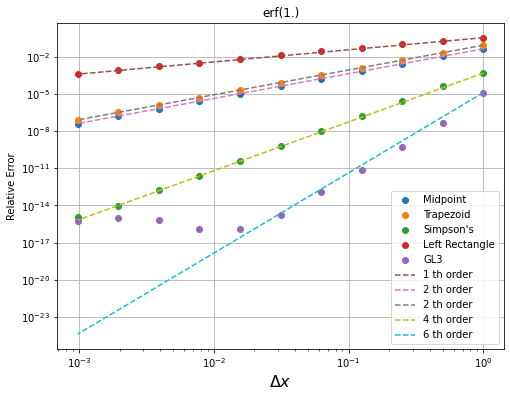

In [16]:
#Let's test with erf(1) and a lot of points

x = 1.
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)    

N = [ 2**n for n in range (11)]

plot_quad_convergence(f, 0., 1., N, I_true, 'erf(1.)')

**(e)** [3] Estimate the number of *function evaluations* required to get a relative error $e \approx 10^{-7}$ i.e. about 7 digits of precision for the schemes

* Mid-point
* Simpson's
* 3-Pt GL quadrature


**Answer to Question 1(e)**

Midpoint: Appears to be about $638$ function evaluations <br>
Simpsons: Appears to be about $9$ function evaluations <br>
3GL: about 2

## Question 2

Let's repeat the problem with a harder integral.

Consider the scaled Fresnel integrals

$$I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx~~~~\text{and}~~~~I_s = \int^1_0 \frac{\sin x}{\sqrt{x}} dx$$

which have values

$$I_c = \sqrt{2 \pi} \cdot C\left(\sqrt{\frac{2}{\pi}}\right) \approx 1.8090484758005438$$

$$I_s = \sqrt{2 \pi} \cdot S\left(\sqrt{\frac{2}{\pi}}\right) \approx 0.62053660344676231$$

where the functions $C(x)$ and $S(x)$ can be evaluated by `scipy.special.fresnel`.


**(a)** [2] Where do you imagine the problematic points of the integrals will be?

**Answer to Question 2(a)**

As shown on the graph above, when x closes to zero, the values of the integral goes to infinity, so the problematic point is zero actually

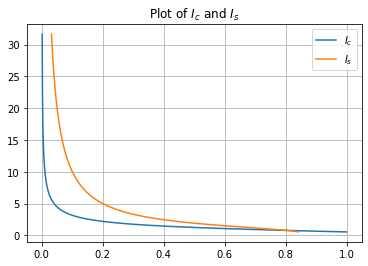

In [17]:
x = numpy.arange(0.001,1,0.0001)
y = numpy.cos(x)/numpy.sqrt(x)
z = numpy.sin(x)/numpy.sqrt(x)
plt.plot(x,y,label='$I_c$')
plt.plot(z,y,label='$I_s$')
plt.title("Plot of $I_c$ and $I_s$")
plt.legend()
plt.grid()

**(b)** [4] Use your convergence plotting routine to make  2 plots showing convergence behavior for all the extended quadrature rules for $I_c$ and $I_s$ 

In [18]:
# Set the True solutions for reference
Is_true, Ic_true = fresnel(numpy.sqrt(2.0 / numpy.pi))
Is_true *= numpy.sqrt(2.0 * numpy.pi)
Ic_true *= numpy.sqrt(2.0 * numpy.pi)

370961177719052.8 evaluations needed to reach the 10^(-7) relative error for left rect
15006017088429.11 evaluations needed to reach the 10^(-7) relative error for midpoint
185480091036710.25 evaluations needed to reach the 10^(-7) relative error for trap
61826436231342.25 evaluations needed to reach the 10^(-7) relative error for simpson
1905975360305.9146 evaluations needed to reach the 10^(-7) relative error for GL3


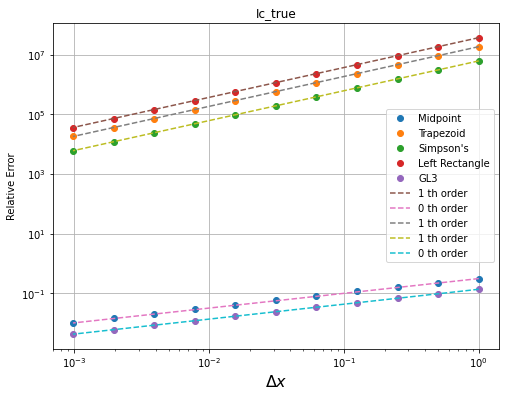

4290279.117613053 evaluations needed to reach the 10^(-7) relative error for left rect
10044.146151830219 evaluations needed to reach the 10^(-7) relative error for midpoint
22708.567132489705 evaluations needed to reach the 10^(-7) relative error for trap
5998.685692312182 evaluations needed to reach the 10^(-7) relative error for simpson
1181.9377348863445 evaluations needed to reach the 10^(-7) relative error for GL3


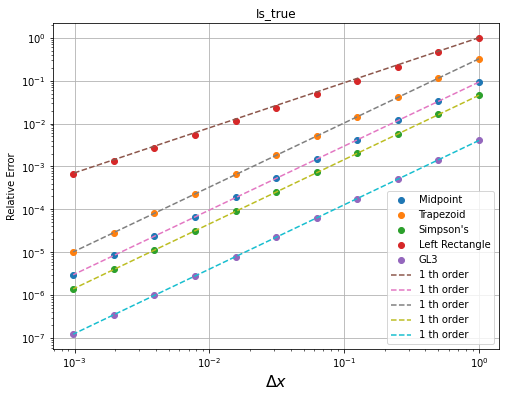

In [19]:
f=lambda x: numpy.cos(x)/numpy.sqrt(x)
N = [ 2**n for n in range (11)]
plot_quad_convergence(f, numpy.finfo(float).eps, 1., N, I_true=Ic_true, title='Ic_true')

f=lambda x: numpy.sin(x)/numpy.sqrt(x)
plot_quad_convergence(f, numpy.finfo(float).eps, 1., N, I_true=Is_true,title='Is_true')

**(c)**  [4] Explain the results of your plots

**Anser to Question 2 (c)**

If i set a equals to zero ill not be able to plot trapezoid, simpson's and left rectangle since they all need boundary points to calculate boundary values, when x equals to zero, f(x) will be infinity.

So, i set the initial point equals to eps to get the smallest value that close to zero.

However, we can see that the relative errors of Ic_ture of Trapezoid, left rectangle and simpson's are very large. that should be all infinity, the reason why they are not is i set the initial value equals to machine epsilon, even though epsilon is small but its actually not small enough!


The speed of convergence of Is_true is faster than Ic_true but even GL3 will also use 1182 iterations

**(d)** [4] show that the convergence and the quadrature schemes can be dramatically improved simply by tranforming the variable $x$ with $x=t^2$

1. Show analytically what the transformed integral should be
2. produce two more plots demonstrating convergence behaviour
3. comment on the results

**Answer of Question 2 (d)**

After the transformation, the integral should look like something below:

$$
\int_0^1 \frac{cos(t^2)}{t} dx \\
\int_0^1 \frac{sin(t^2)}{t} dx \\ 
dx = 2tdt
$$

We then can get the following integrals by substituting $dx = 2tdt$ into the integrals above:

$$
\begin{aligned}
\int_0^1 \frac{cos(t^2)}{t} 2tdt &= \int_0^1 2 cos(t^2) dt \\
\int_0^1 \frac{sin(t^2)}{t} 2tdt &= \int_0^1 2 sin(t^2) dt\\ 
\end{aligned}
$$


6231497.957515264 evaluations needed to reach the 10^(-7) relative error for left rect
885.4012979906568 evaluations needed to reach the 10^(-7) relative error for midpoint
1249.294510515934 evaluations needed to reach the 10^(-7) relative error for trap
6.370547935406563 evaluations needed to reach the 10^(-7) relative error for simpson
3.142191018770035 evaluations needed to reach the 10^(-7) relative error for GL3


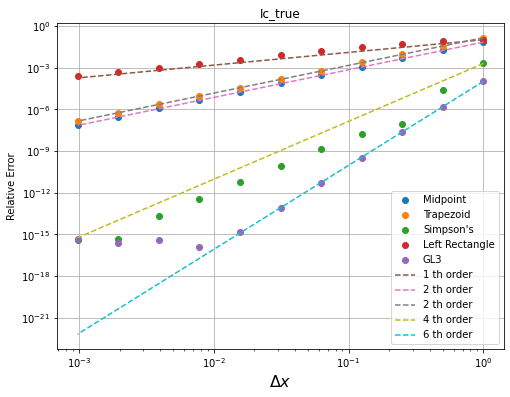

19045884.120476212 evaluations needed to reach the 10^(-7) relative error for left rect
1169.6702959461074 evaluations needed to reach the 10^(-7) relative error for midpoint
1668.411053076903 evaluations needed to reach the 10^(-7) relative error for trap
20.065474273629867 evaluations needed to reach the 10^(-7) relative error for simpson
3.0461820991242328 evaluations needed to reach the 10^(-7) relative error for GL3


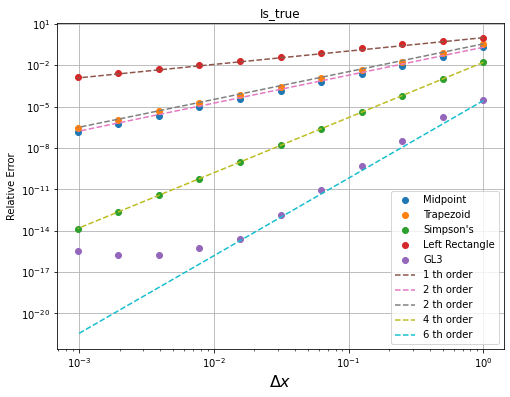

In [20]:
fc=lambda t: 2*numpy.cos(t**2)
N = [ 2**n for n in range (11)]
plot_quad_convergence(fc, numpy.finfo(float).eps, 1., N, I_true=Ic_true,title='Ic_true')

fs=lambda t: 2*numpy.sin(t**2)
N = [ 2**n for n in range (11)]
plot_quad_convergence(fs, numpy.finfo(float).eps, 1., N, I_true=Is_true,title='Is_true')

**Answer to Question 2 (d)**

Since the extremum of denominator will not go to infinity (in the domain $t \in \left[0,1 \right]$) and the integrals were transformed to something normal($cos$ and $sin$ basically) by applying $x = t^2$, we then can use these 5 methods to calculate the convergence and plot something decent.

We can also notice that the order of convergence of these two Ic_true and Is_ture are different. 

As for Ic_true, the total convergence of these five methods are all slightly smaller than Is_true, the orders are 1, 2, 2, 4, 6 perspectively

GL3 also is the first one to hit machine epsilon which means it is truly a powerful method! only use 3 interations!

We can also analyze this thing from iteration times, we can say left rect method actually takes the most steps, midpoint and trap are not that bad.